[DIY Covid-19 Dashboard](https://github.com/fsmeraldi/diy-covid19dash) (C) Joshua Hunter, 2020 ([ec20719@qmul.ac.uk] All rights reserved.

# DIY Covid-19 Dashboard

This is a DIY Covid-19 Dashboard developed by Josh Hunter.

In [1]:
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [2]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [3]:
# Load JSON files and store the raw data in some variable. Edit as appropriate
with open("timeseries.json", "rt") as INFILE:
    data1=json.load(INFILE)
datalist=data1['data']
datalist

[{'date': '2020-11-24', 'Newcases': 11299, 'Cumcases': 1538794},
 {'date': '2020-11-23', 'Newcases': 15450, 'Cumcases': 1527495},
 {'date': '2020-11-22', 'Newcases': 18662, 'Cumcases': 1512045},
 {'date': '2020-11-21', 'Newcases': 19875, 'Cumcases': 1493383},
 {'date': '2020-11-20', 'Newcases': 20252, 'Cumcases': 1473508},
 {'date': '2020-11-19', 'Newcases': 22915, 'Cumcases': 1453256},
 {'date': '2020-11-18', 'Newcases': 19609, 'Cumcases': 1430341},
 {'date': '2020-11-17', 'Newcases': 20051, 'Cumcases': 1410732},
 {'date': '2020-11-16', 'Newcases': 21363, 'Cumcases': 1390681},
 {'date': '2020-11-15', 'Newcases': 24962, 'Cumcases': 1369318},
 {'date': '2020-11-14', 'Newcases': 26860, 'Cumcases': 1344356},
 {'date': '2020-11-13', 'Newcases': 27301, 'Cumcases': 1317496},
 {'date': '2020-11-12', 'Newcases': 33470, 'Cumcases': 1290195},
 {'date': '2020-11-11', 'Newcases': 22950, 'Cumcases': 1256725},
 {'date': '2020-11-10', 'Newcases': 20412, 'Cumcases': 1233775},
 {'date': '2020-11-09', '

## Wrangle the data

The is the logic to wrangle the raw data into a ```DataFrame``` that will be used for plotting. This dashboard will display the newcases in the UK for each date provided by Public Health England and also a running total of all the cases in the UK to date.  

In [4]:
def wrangle_data(data):
    dates=[dictionary['date'] for dictionary in datalist ]

    dates.sort()

    def parse_date(datestring):
        """ Convert a date string into a pandas datetime object """
        return pd.to_datetime(datestring, format="%Y-%m-%d")

    startdate=parse_date(dates[0])
    enddate=parse_date(dates[-1])

    index=pd.date_range(startdate, enddate, freq='D')
    timeseriesdf=pd.DataFrame(index=index, columns=['Newcases', 'Cumcases'])

    for entry in datalist: # each entry is a dictionary with date, cases, hospital and deaths
        date=parse_date(entry['date'])
        for column in ['Newcases', 'Cumcases']:
        # check that nothing is there yet - just in case some dates are duplicated,
        # maybe with data for different columns in each entry
            if pd.isna(timeseriesdf.loc[date, column]): 
            # replace None with 0 in our data 
                value= int(entry[column]) if entry[column]!=None else 0
                # this is the way you access a specific location in the dataframe - use .loc
                # and put index,column in a single set of [ ]
                timeseriesdf.loc[date, column]=value
            
    # fill in any remaining "holes" due to missing dates
    timeseriesdf.fillna(0, inplace=True)
    return timeseriesdf

df1=wrangle_data(data1)

df1

,Newcases,Cumcases
2020-01-03,0,0
2020-01-04,0,0
2020-01-05,0,0
2020-01-06,0,0
2020-01-07,0,0
...,...,...
2020-11-20,20252,1473508
2020-11-21,19875,1493383
2020-11-22,18662,1512045
2020-11-23,15450,1527495


## Download current data

Here is a button that al users to refresh the data from Public Health England. 

In [5]:
# Place your API access code in this function. Do not call this function directly; it will be called by 
# the button callback. 
def access_api():
    """ Accesses the PHE API. Returns raw data in the same format as data loaded from the "canned" JSON file. """
    filters = [
    'areaType=overview' # note each metric-value pair is inside one string
    ]
    structure = {
    "date": "date",
    "Newcases": "newCasesByPublishDate",
    "Cumcases": "cumCasesByPublishDate"
    }
    api = Cov19API(filters=filters, structure=structure)
    timeseries=api.get_json()
    
    with open("timeseries.json", "rt") as INFILE:
        data1=json.load(INFILE)
    
    return data1

data1

{'data': [{'date': '2020-11-24', 'Newcases': 11299, 'Cumcases': 1538794},
  {'date': '2020-11-23', 'Newcases': 15450, 'Cumcases': 1527495},
  {'date': '2020-11-22', 'Newcases': 18662, 'Cumcases': 1512045},
  {'date': '2020-11-21', 'Newcases': 19875, 'Cumcases': 1493383},
  {'date': '2020-11-20', 'Newcases': 20252, 'Cumcases': 1473508},
  {'date': '2020-11-19', 'Newcases': 22915, 'Cumcases': 1453256},
  {'date': '2020-11-18', 'Newcases': 19609, 'Cumcases': 1430341},
  {'date': '2020-11-17', 'Newcases': 20051, 'Cumcases': 1410732},
  {'date': '2020-11-16', 'Newcases': 21363, 'Cumcases': 1390681},
  {'date': '2020-11-15', 'Newcases': 24962, 'Cumcases': 1369318},
  {'date': '2020-11-14', 'Newcases': 26860, 'Cumcases': 1344356},
  {'date': '2020-11-13', 'Newcases': 27301, 'Cumcases': 1317496},
  {'date': '2020-11-12', 'Newcases': 33470, 'Cumcases': 1290195},
  {'date': '2020-11-11', 'Newcases': 22950, 'Cumcases': 1256725},
  {'date': '2020-11-10', 'Newcases': 20412, 'Cumcases': 1233775},
  

In [6]:
# Printout from this function will be lost in Voila unless captured in an
# output widget - therefore, we give feedback to the user by changing the 
# appearance of the button
def api_button_callback(button):
    """ Button callback - it must take the button as its parameter (unused in this case).
    Accesses API, wrangles data, updates global variable df used for plotting. """
    # Get fresh data from the API. If you have time, include some error handling
    # around this call.
    apidata=access_api()
    # wrangle the data and overwrite the dataframe for plotting
    global df1
    df1=wrangle_data(apidata)
    # the graph won't refresh until the user interacts with the widget.
    # this function simulates the interaction, see Graph and Analysis below.
    # you can omit this step in the first instance
    #refresh_graph()
    # after all is done, you can switch the icon on the button to a "check" sign
    # and optionally disable the button - it won't be needed again. You can use icons
    # "unlink" or "times" and change the button text to "Unavailable" in case the 
    # api call fails.
    apibutton.icon="check"
    # apibutton.disabled=True

    
apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to download current Public Health England data',
    icon='download' # (FontAwesome names without the `fa-` prefix)
)

# remember to register your button callback function with the button
apibutton.on_click(api_button_callback) # the name of your function inside these brackets

display(apibutton)

# run all cells before clicking on this button

Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current Pu…

## Graphs and Analysis

Include at least one graph with interactive controls, as well as some instructions for the user and/or comments on what the graph represents and how it should be explored (this example shows two random walks)

Output()

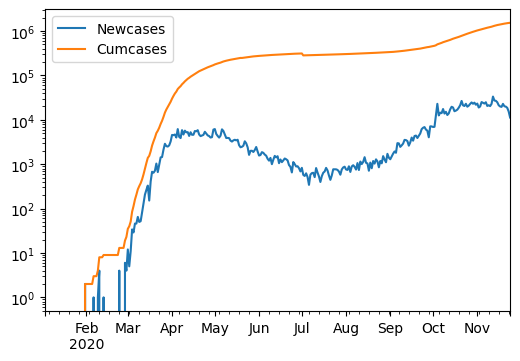

In [10]:
cases=wdg.SelectMultiple(
    options=['Newcases', 'Cumcases'],
    value=['Newcases', 'Cumcases'],
    rows=2,
    description='Cases',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Scale:',
    disabled=False
)

# try replacing HBox with a VBox
controls=wdg.HBox([cases, scale])

def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        df1[list(gcols)].plot(logy=logscale)
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

# keep calling timeseries_graph(gcols=value_of_series, gscale=value_of_scale); capture output in variable graph   
graph=wdg.interactive_output(timeseries_graph, {'gcols': cases, 'gscale': scale})

display(controls, graph)

df1.plot(logy=True)

## Deploying the dashboard

Once your code is ready and you are satisfied with the appearance of the graphs, replace all the text boxes above with the explanations you would like a dashboard user to see. The next step is deploying the dashboard online - there are several [options](https://voila.readthedocs.io/en/stable/deploy.html) for this, we suggest deploying as a [Binder](https://mybinder.org/). This is basically the same technique that has been used to package this tutorial and to deploy this template dashboard. The instructions may seem a bit involved, but the actual steps are surprisingly easy - we will be going through them together during a live session. You will need an account on [GitHub](https://github.com/) for this - if you don't have one already, now it's the time to create it. 

**Author and Copyright Notice** Remember if you deploy this dashboard as a Binder it will be publicly accessible. Take credit for your work! Also acknowledge the data source: *Based on UK Government [data](https://coronavirus.data.gov.uk/) published by [Public Health England](https://www.gov.uk/government/organisations/public-health-england).*